In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [2]:
def combine_wav(data_path1, data_path2, result_path):
    signal1, sr1 = sf.read(data_path1)
    signal2, sr2 = sf.read(data_path2)

    mixed_signal = signal1 + signal2
    mixed_signal /= np.max(np.abs(signal1 + signal2)) # Normalization

    sf.write(result_path, mixed_signal, sr1)

In [3]:
def plot_fft(signal, sr, title):
    # Compute FFT
    fft_vals = np.fft.rfft(signal)
    fft_freqs = np.fft.rfftfreq(len(signal), 1 / sr)

    # Convert to magnitude
    magnitude = np.abs(fft_vals)

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(fft_freqs, magnitude, alpha=0.7)
    plt.title(f'Frequency Spectrum - {title}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [4]:
combine_wav("output/filtered_output_100_250.wav", "output/filtered_output_600_900.wav", "output/combined_output.wav")

Almost identical signals


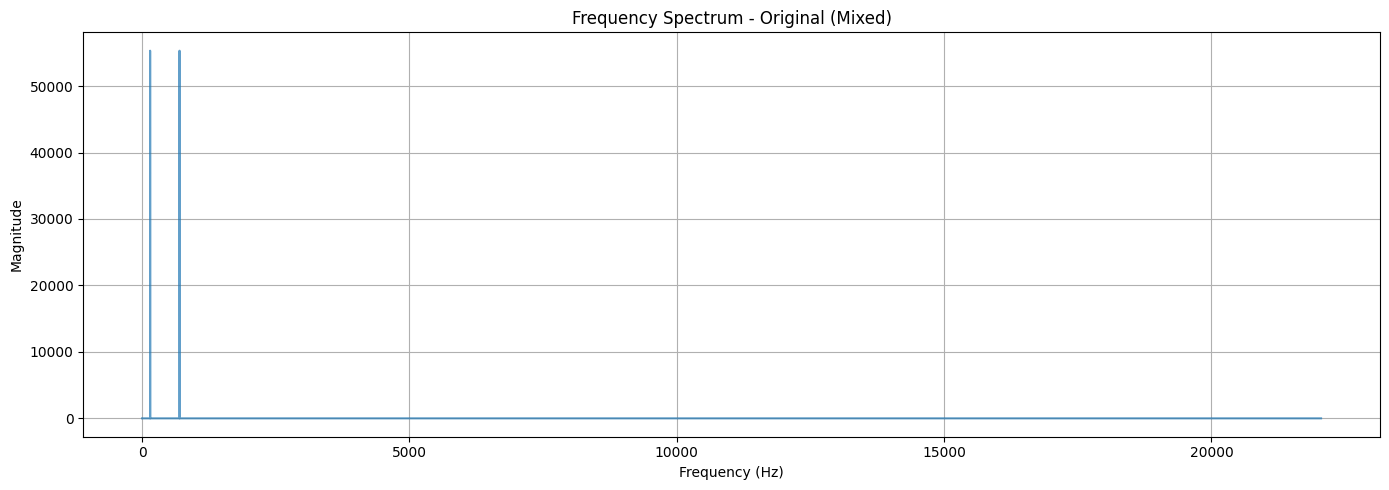

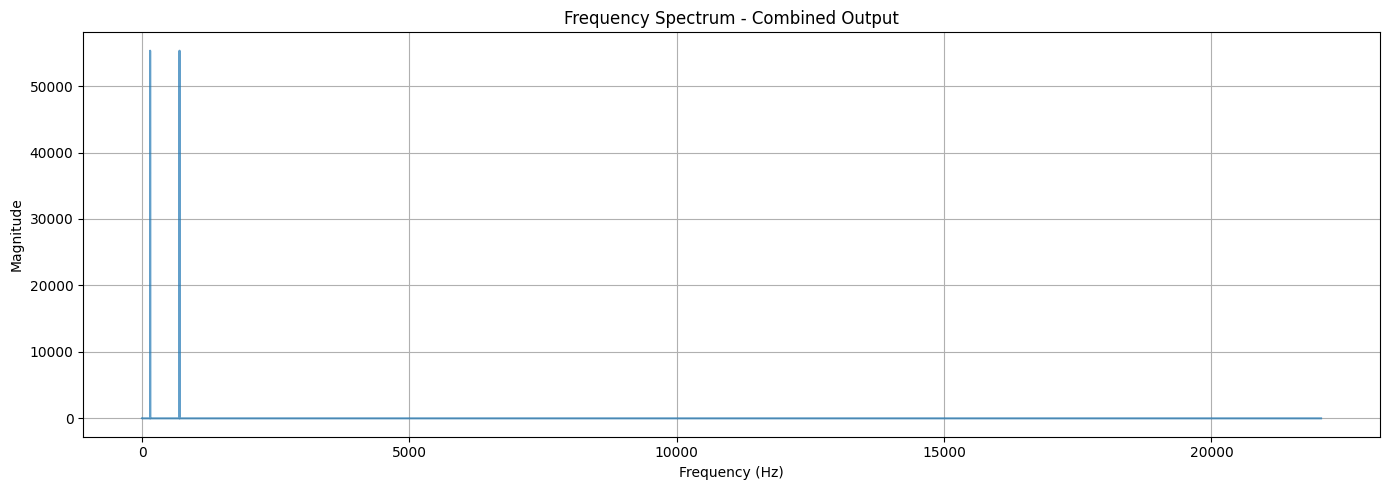

In [ ]:
signal, sr = sf.read('data/mixed_q1.wav')
signal2, sr2 = sf.read('output/combined_output.wav')

if np.allclose(signal, signal2, atol=1e-4):
    print("Almost identical signals")
else:
    print("Not identical signals")

plot_fft(signal, sr, 'Original (Mixed)')
plot_fft(signal2, sr2, 'Combined Output')